In [1]:
# pip install plotly

In [2]:
# pip install us
# pip install ace_tools

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
import plotly.graph_objs as go

In [4]:
data = pd.read_excel('Adidas US Sales Datasets.xlsx')
data.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


## Business problems that can be solved using this dataset:
1. Sales Performance Analysis: Which products are excelling in sales, and which are underperforming?
2. Regional Market Analysis: Which stores are experiencing strong sales, and which ones are lagging?
3. Profit Margin Analysis: Does the profit margin significantly impact sales?
4. Efficiency of Sales Methods: Which sales method is more effective - in-store or online?
5. Price Optimization: Is there a specific price range that achieves better sales than others?
6. Product Portfolio Optimization I: Determine which products are most profitable, segmented by location.
7. Market Expansion Opportunities: Assess the best and worst performing stores based on their locations.
8. Time Series Analysis: Investigate whether there has been a consistent sales trend over time or any noticeable monthly trends.
9. Predictive Sales Analysis: Develop a forecast for monthly sales.

MODIFICATIONS:
1. Price Elasticity of Demand
2. Anomaly Detection in Sales
3. Geographic Sales Heatmap

## 0. Performing Exploratory Data Analysis (EDA)

In [5]:
# Shape of the dataframe
data.shape

(9648, 13)

In [6]:
# Duplicate Rows
data.duplicated().sum()

np.int64(0)

In [7]:
# Info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


In [8]:
# Null values
data.isnull().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [9]:
# Overview of the data head
data.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [10]:
# Overview of the data tail
data.tail()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64,3200.0,896.00,0.28,Outlet
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105,4305.0,1377.60,0.32,Outlet
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184,7544.0,2791.28,0.37,Outlet
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70,2940.0,1234.80,0.42,Outlet
9647,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Women's Street Footwear,29.0,83,2407.0,649.89,0.27,Outlet


In [11]:
# # Remove non-numeric characters from the columns
data['Total Sales'] = data['Total Sales'].astype(str).str.replace(r'[$, ]', '', regex=True).astype(float)
data['Units Sold'] = data['Units Sold'].astype(str).str.replace(r'[$, ]', '', regex=True).astype(float)
data['Operating Profit'] = data['Operating Profit'].astype(str).str.replace(r'[$, ]', '', regex=True).astype(float)
data['Operating Margin'] = data['Operating Margin'].astype(str).str.replace(r'[$, ]', '', regex=True).astype(float)


In [12]:
# Convert Invoice Date to DateTime Object.
data['Invoice Date'] = pd.to_datetime(data['Invoice Date'])

## 1. Sales Performance Analysis: Which products are excelling in sales, and which are underperforming?

In [13]:
# First lets find out the total revenue
total_revenue = data['Total Sales'].sum()
total_revenue

np.float64(899902125.0)

In [14]:
# Aggregating total sales and units sold for each product
product_sales = data.groupby('Product').agg({'Total Sales': 'sum', 'Units Sold': 'sum'}).reset_index()

# Sorting products by total sales in descending order to identify top-performing products
top_performing_products = product_sales.sort_values(by='Total Sales', ascending=False).head()

# Displaying the results
print("Top-Performing Products:")
top_performing_products

Top-Performing Products:


,Product,Total Sales,Units Sold
2,Men's Street Footwear,208826244.0,593320.0
3,Women's Apparel,179038860.0,433827.0
1,Men's Athletic Footwear,153673680.0,435526.0
5,Women's Street Footwear,128002813.0,392269.0
0,Men's Apparel,123728632.0,306683.0


In [15]:
# Sorting products by total sales in ascending order to identify underperforming products
underperforming_products = product_sales.sort_values(by='Total Sales', ascending=True).head()

print("\nUnderperforming Products:")
underperforming_products


Underperforming Products:


,Product,Total Sales,Units Sold
4,Women's Athletic Footwear,106631896.0,317236.0
0,Men's Apparel,123728632.0,306683.0
5,Women's Street Footwear,128002813.0,392269.0
1,Men's Athletic Footwear,153673680.0,435526.0
3,Women's Apparel,179038860.0,433827.0


Insights: Men's Street Footware are the highest sold products with sales of $208,826,244 and the most underperforming product is Women's Athletic Footwear with sales of $106,631,896

## 2. Regional Market Analysis: Which stores are experiencing strong sales, and which ones are lagging?

In [16]:
data.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900.0,540000.0,162000.0,0.30,In-store


In [17]:
# For this analysis, I will find out the best and the worst performing store in each city mentioned. First I will find out how many cities and in those cities how many store exist. 
# To predict the output, - If there are X cities then the number of stores we want in out output are X times 2 -> 2X

In [18]:
# Unique Cities
unique_cities = data['City'].unique
print(f'Unique cities:', unique_cities)

# Lets find out the number of unique cities
num_unique_cities = data['City'].nunique()
print(f'Number of unique cities:', num_unique_cities)

Unique cities: <bound method Series.unique of 0         New York
1         New York
2         New York
3         New York
4         New York
           ...    
9643    Manchester
9644    Manchester
9645    Manchester
9646    Manchester
9647    Manchester
Name: City, Length: 9648, dtype: object>
Number of unique cities: 52


In [19]:
# Group by 'City' and 'Retailer', and sum the 'Units Sold'
three_columns_grouped = data.groupby(['City', 'Retailer'])['Units Sold'].sum().reset_index()

# Sorting the results within each city to find the top and worst performing retailers
three_columns_sorted = three_columns_grouped.sort_values(by=['City', 'Units Sold'], ascending=[True, False])

# Getting the top performing retailer in each city
top_performers = three_columns_sorted.groupby('City').head(1)

# Getting the worst performing retailer in each city
worst_performers = three_columns_sorted.groupby('City').tail(1)

In [20]:
# Display the results
print("Top Performing Retailers in Each City:")
top_performers.head()


Top Performing Retailers in Each City:


,City,Retailer,Units Sold
1,Albany,West Gear,47133.0
2,Albuquerque,Kohl's,43752.0
4,Anchorage,Amazon,26749.0
7,Atlanta,Sports Direct,41414.0
8,Baltimore,Foot Locker,9322.0


In [21]:

print("\nWorst Performing Retailers in Each City:")
worst_performers.head()


Worst Performing Retailers in Each City:


,City,Retailer,Units Sold
0,Albany,Kohl's,10053.0
3,Albuquerque,Sports Direct,8881.0
5,Anchorage,Foot Locker,4066.0
6,Atlanta,Foot Locker,14977.0
10,Baltimore,West Gear,5647.0


## 3. Profit Margin Analysis: Does the Opearing profit significantly impact sales?

In [22]:
# We can answer the above question in the traditional long way using tables and graphs or we can also find the correlation between the Operating profit and Total Sales, if it is positive, the answer to the question is yes, and vice versa.

# Correlation bewtween Operating Profit and Total Sales
correlation = data['Operating Profit'].corr(data['Total Sales'])
correlation

np.float64(0.9563074349716087)

0.9563 correlation indicates a strong positive correlation between Total Sales and Operating Profit.

In [23]:
# Correlation bewtween Operating Profit and Total Sales
correlation = data['Operating Profit'].corr(data['Units Sold'])
correlation

np.float64(0.8923793765537954)

Moreover, to add more, there is also a positive correlation between Units Sold and Operating Profit

1. The correlation is positive, 0.9563
2. This shows that as the Total Sales go up the Operating Profit also go up.
3. So the answer to question 3 is YES. Operating Profit does affect Units Sold in a positive way

## 4. Efficiency of Sales Methods: Which sales method is more effective - in-store or online?

In [24]:
# Finding the unique column in the df

sales_method_col = data['Sales Method']
unique_sales_method_col = sales_method_col.unique()
unique_sales_method_col

array(['In-store', 'Outlet', 'Online'], dtype=object)

In [25]:
##### When we plot maps in plotly, it requires the state names to be 2 letter abbrivations like NY, CA, NJ, etc instead of New York, California, New Jersey. So we use a library called "us" that will help me achieve this.

In [26]:
from us import states

state_column = data['State']

# Get the two-letter abbreviations of the state names
state_abbreviations = []
for state in state_column:
    try:
        # Lookup state by name or existing abbreviation
        state_abbreviation = states.lookup(state).abbr
    except AttributeError:
        # In case the state is not found, set the abbreviation to None
        state_abbreviation = None
    state_abbreviations.append(state_abbreviation)

# Create a new column in the dataframe with the two-letter abbreviations
data['State Abbreviation'] = state_abbreviations

In [27]:
# Checking the contents of the new column 
data['State Abbreviation'].head()

0    NY
1    NY
2    NY
3    NY
4    NY
Name: State Abbreviation, dtype: object

#### 4.1 Demonstrating Total Sales by State, Product, and Sales Method in the US using Choropleth Map

In [28]:
# Removing currency symbols and converting 'Total Sales' to numeric
data['Total Sales'] = data['Total Sales'].replace('[\$,]', '', regex=True).astype(float)

# Initialize the figure
fig = go.Figure()

# List of unique products and sales methods
products = data['Product'].unique()
sales_methods = data['Sales Method'].unique()

# Add traces for each combination of product and sales method
for product in products:
    for method in sales_methods:
        filtered_df = data[(data['Product'] == product) & (data['Sales Method'] == method)]
        state_sales = filtered_df.groupby('State Abbreviation')['Total Sales'].sum().reset_index()

        fig.add_trace(
            go.Choropleth(
                locations=state_sales['State Abbreviation'], 
                z=state_sales['Total Sales'], 
                locationmode='USA-states', 
                colorscale='Viridis',
                name=f"{product} - {method}",
                showscale=True,
                visible=False  # Initially, all traces are hidden
            )
        )

# Update layout with dropdown menus
product_buttons = [
    {'label': product, 'method': 'update', 'args': [{'visible': [trace.name.startswith(product) for trace in fig.data]}]}
    for product in products
]

sales_method_buttons = [
    {'label': method, 'method': 'update', 'args': [{'visible': [method in trace.name for trace in fig.data]}]}
    for method in sales_methods
]

fig.update_layout(
    updatemenus=[
        {'buttons': product_buttons, 'direction': 'down', 'showactive': True, 'x': 0.25, 'xanchor': 'left', 'y': 1.15, 'yanchor': 'top'},
        {'buttons': sales_method_buttons, 'direction': 'down', 'showactive': True, 'x': 0.75, 'xanchor': 'left', 'y': 1.15, 'yanchor': 'top'}
    ],
    geo=dict(scope='usa'),
    title="Total Sales by State, Product, and Sales Method"
)

# Initially displaying the first product and first sales method
if fig.data:
    fig.data[0].visible = True

fig.show()

In [29]:
#Which method is best
# Segmenting and aggregating data by 'Sales Method'
sales_method_grouped = data.groupby('Sales Method').agg({'Total Sales': 'sum', 'Operating Profit': 'sum'})

# Calculating the Operating Margin for each sales method
sales_method_grouped['Operating Margin'] = sales_method_grouped['Operating Profit'] / sales_method_grouped['Total Sales']

sales_method_grouped

,Total Sales,Operating Profit,Operating Margin
Sales Method,,,
In-store,356643750.0,1.275913e+08,0.357756
Online,247672882.0,9.655518e+07,0.389850
Outlet,295585493.0,1.079883e+08,0.365337


#### Interpreting the above table in words for easier understanding. 

1.	Total Sales:
•	In-store: $356,643,750
•	Online: $247,672,882
•	Outlet: $295,585,493
In-store sales have the highest total sales, followed by outlet and then online sales.

2.	Operating Profit:
•	In-store: $127,591,300 (approximately)
•	Online: $96,555,180 (approximately)
•	Outlet: $107,988,300 (approximately)
Similar to total sales, in-store sales lead in operating profit, followed by outlet and then online.

3.	Operating Margin (Operating Profit divided by Total Sales):
•	In-store: 0.357756 (or 35.78%)
•	Online: 0.389850 (or 38.99%)
•	Outlet: 0.365337 (or 36.53%)

Here, while in-store sales have the highest total sales and profit, online sales have the highest operating margin, indicating a higher profitability relative to the sales generated.
Insights:
•	In terms of Total Sales and Operating Profit: In-store sales method is the most effective, generating the highest total sales and operating profit.
•	In terms of Operating Margin: Online sales are the most effective, indicating that although the total sales and operating profit are lower than in-store, the profitability relative to the sales generated is higher.

When deciding which sales method is more effective, it depends on what the business prioritizes. If the focus is on maximizing total revenue and profit, then in-store sales are more effective. However, if the focus is on efficiency in terms of profit generated per dollar of sales, then online sales are more effective.


## 5. Price Optimization: Is there a specific price range that achieves better sales than others?

In [30]:
# Define the price bins
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130]

# Create a new column for the price range
data['Price Range'] = pd.cut(data['Price per Unit'], bins)

# Group by the price range and sum the total sales
sales_by_price_range = data.groupby('Price Range')['Total Sales'].sum().reset_index()

# Sorting the results to see which price range has the highest sales
sorted_sales_by_price_range = sales_by_price_range.sort_values(by='Total Sales', ascending=False)

# Results are sorted based on Total Sales 
sorted_sales_by_price_range

/tmp/ipykernel_37919/623158052.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Price Range,Total Sales
4,"(40, 50]",220666307.0
5,"(50, 60]",210865002.0
6,"(60, 70]",190679285.0
3,"(30, 40]",134726187.0
7,"(70, 80]",52787579.0
8,"(80, 90]",33547420.0
2,"(20, 30]",29636023.0
9,"(90, 100]",14468685.0
1,"(10, 20]",6574478.0
11,"(110, 120]",3080000.0


#### Interpreting the above table in words for easier understanding
1.	The highest total sales are in the price range of $40 to $50 ($220,666,307), indicating that products priced within this range are very popular or in high demand.
2.	The next highest sales are in the price ranges of $50 to $60 ($210,865,002) and $60 to $70 ($190,679,285). These ranges also appear to be effective in terms of sales.
3.	As the price increases beyond $70, there is a noticeable drop in total sales. For instance, the range $70 to $80 sees a significant decrease to $52,787,579.
4.	The lowest sales figures are observed in the extreme low end ($0 to $10) and high end ($110 to $130) of the price spectrum.

#### Insights:
•	Products priced in the mid-range (specifically between $40 and $70) seem to be achieving the best sales. This could indicate a sweet spot for pricing where customers are more willing to purchase.

•	Very low-priced products (below $20) and higher-priced products (above $90) show significantly lower sales. This might be due to various factors like perceived value, product quality, target customer segment, or availability.

•	The $120 to $130 range shows no sales, indicating either a lack of products in this range or no demand for products at this price point.

#### Conclusion:
•	A specific price range, notably between $40 and $70, does achieve better sales compared to other ranges.

•	Understanding the reasons behind this trend would require additional qualitative analysis, such as customer preferences, product types within each price range, market competition, and promotional strategies.

•	This insight can be useful for pricing strategies, inventory management, and marketing campaigns, focusing more on the price ranges that have shown higher sales volumes.


## 6. Product Portfolio Optimization: Determine which products are most profitable, segmented by location.

In [31]:
# Grouping data by location and product
grouped_data = data.groupby(['City', 'Product']).agg({'Operating Profit': 'sum', 'Total Sales': 'sum'}).reset_index()

# Calculating Profit Margin
grouped_data['Profit Margin'] = grouped_data['Operating Profit'] / grouped_data['Total Sales']

# Sorting within each location to find the most profitable products
grouped_data.sort_values(by=['City', 'Profit Margin'], ascending=[True, False], inplace=True)

# Optionally, display the top 5 most profitable products for each city
top_products_by_city = grouped_data.groupby('City').head(5)

top_products_by_city

,City,Product,Operating Profit,Total Sales,Profit Margin
3,Albany,Women's Apparel,2343150.19,4779109.0,0.490290
2,Albany,Men's Street Footwear,2649927.25,5773987.0,0.458942
0,Albany,Men's Apparel,1354932.08,3873553.0,0.349791
1,Albany,Men's Athletic Footwear,1329200.59,3829596.0,0.347086
4,Albany,Women's Athletic Footwear,908094.68,2973011.0,0.305446
...,...,...,...,...,...
309,Wilmington,Women's Apparel,1016327.95,2520405.0,0.403240
310,Wilmington,Women's Athletic Footwear,500967.12,1242580.0,0.403167
311,Wilmington,Women's Street Footwear,605627.89,1502297.0,0.403135
308,Wilmington,Men's Street Footwear,1244055.88,3522197.0,0.353205


In [32]:
# Grouping data by product and city and summing total sales
grouped_data = data.groupby(['Product', 'City'])['Total Sales'].sum().reset_index()

# For each product, find the city where it performs the best and the worst
best_worst_performing_cities = []

for product in grouped_data['Product'].unique():
    product_data = grouped_data[grouped_data['Product'] == product]
    best_city = product_data[product_data['Total Sales'] == product_data['Total Sales'].max()]
    worst_city = product_data[product_data['Total Sales'] == product_data['Total Sales'].min()]
    best_worst_performing_cities.extend([best_city, worst_city])

# Concatenating the results into a single DataFrame
best_worst_performing_cities_df = pd.concat(best_worst_performing_cities).reset_index(drop=True)

# Display the results
print("Best and Worst Performing Cities for Each Product:")
best_worst_performing_cities_df

Best and Worst Performing Cities for Each Product:


,Product,City,Total Sales
0,Men's Apparel,New York,6835166.0
1,Men's Apparel,Omaha,530197.0
2,Men's Athletic Footwear,New York,6301528.0
3,Men's Athletic Footwear,Omaha,942983.0
4,Men's Street Footwear,Charleston,9479502.0
5,Men's Street Footwear,Omaha,2131074.0
6,Women's Apparel,Charleston,8147789.0
7,Women's Apparel,Omaha,1202661.0
8,Women's Athletic Footwear,New York,5201048.0
9,Women's Athletic Footwear,Omaha,465677.0


### Sales and Profitability Analysis by Location

**Profitability Insights:**

In Albany, 'Women's Apparel' and 'Men's Street Footwear' are highly profitable, with profit margins around 49% and 46%, respectively.
Wilmington shows a different trend with 'Women's Apparel', 'Women's Athletic Footwear', and 'Women's Street Footwear' leading in profitability, each around 40%.

**Sales Performance Insights:**

New York excels in sales of 'Men's Apparel', 'Men's Athletic Footwear', and 'Women's Athletic Footwear', indicating a strong market for these products.
Charleston and San Francisco are top performers for 'Men's Street Footwear' and 'Women's Street Footwear', respectively.
Omaha consistently shows the lowest sales across various products, suggesting limited market penetration or demand.

**Overall Implications:**

Product popularity and profitability vary significantly by city, indicating the need for tailored marketing and sales strategies in different locations.
The contrasting trends between cities like Albany, Wilmington, and Omaha highlight diverse consumer preferences, underscoring the importance of a location-specific approach in sales and marketing strategies.

## 7. Market Expansion Opportunities: Assess the best and worst performing stores based on their locations.

In [33]:
# Convert the dictionary to a DataFrame, if not already done
df = pd.DataFrame(data)

# Grouping Data by both City and Store Name
grouped_data = df.groupby(['City', 'Retailer']).agg({
    'Total Sales': 'sum',
    'Operating Profit': 'sum'
}).reset_index()

# Calculating Performance Metrics
grouped_data['Profit Margin'] = grouped_data['Operating Profit'] / grouped_data['Total Sales']

# Sorting by Total Sales and Profit Margin
grouped_data = grouped_data.sort_values(by=['City', 'Total Sales', 'Profit Margin'], ascending=[True, False, False])

# Displaying the grouped data
print("Store Performance by City:")
grouped_data

Store Performance by City:


,City,Retailer,Total Sales,Operating Profit,Profit Margin
1,Albany,West Gear,20735165.0,8062399.80,0.388827
0,Albany,Kohl's,3692639.0,1367451.11,0.370318
2,Albuquerque,Kohl's,17065965.0,5783668.15,0.338901
3,Albuquerque,Sports Direct,2799051.0,954392.26,0.340970
4,Anchorage,Amazon,13365025.0,4143804.75,0.310048
...,...,...,...,...,...
103,St. Louis,West Gear,1701133.0,681457.25,0.400590
105,Wichita,Kohl's,6451914.0,2279774.62,0.353349
104,Wichita,Foot Locker,3520950.0,1230372.67,0.349443
106,Wilmington,Foot Locker,8387568.0,3077352.68,0.366895


**Summary**

The data has been aggregated to show the performance of different retail stores in various cities.
The key metrics considered are Total Sales, Operating Profit, and Profit Margin.
Stores are grouped by city and retailer, providing a clear view of each store's performance in its respective location.

Insights

**Top Performers:**

In Albany, 'West Gear' emerges as the top performer with a total sales of approximately $20.7 million and a profit margin of about 38.9%. This is significantly higher than 'Kohl's' in the same city, which has a total sales of around $3.7 million with a profit margin of 37%.
In Albuquerque, 'Kohl's' leads with a total sales of $17.1 million and a profit margin of approximately 33.9%.

**Comparative Store Performances:**

In cities with multiple listed retailers, such as Albuquerque and Wichita, there is a noticeable difference in both sales and profit margins between stores. For example, in Albuquerque, 'Kohl's' not only has higher total sales but also a slightly lower profit margin compared to 'Sports Direct'.

**Profit Margins Analysis:**

Profit margins vary across cities and stores. While 'West Gear' in St. Louis has a high profit margin of 40.1%, other stores like 'Amazon' in Anchorage show lower profit margins (31%).

**Sales vs. Profit Margins:**

There is not always a direct correlation between high sales and high profit margins. For instance, 'Kohl's' in Wichita has higher sales than 'Foot Locker' in the same city, yet their profit margins are fairly close (35.3% for Kohl's vs. 34.9% for Foot Locker).

**Regional Variations:**

The data indicates potential regional variations in store performance. Stores in different cities under the same brand (like 'Kohl's' in Albany vs. Albuquerque) show different levels of sales and profit margins, suggesting that location is a significant factor in retail performance.

**Conclusion**

This analysis provides valuable insights into the performance of retail stores across different cities, highlighting the importance of location in sales and profitability. The data can be used to identify strong and weak performing areas, optimize operations, and strategize for market expansion or improvement.

## 8. Time Series Analysis: Investigate whether there has been a consistent sales trend over time or any noticeable monthly trends.

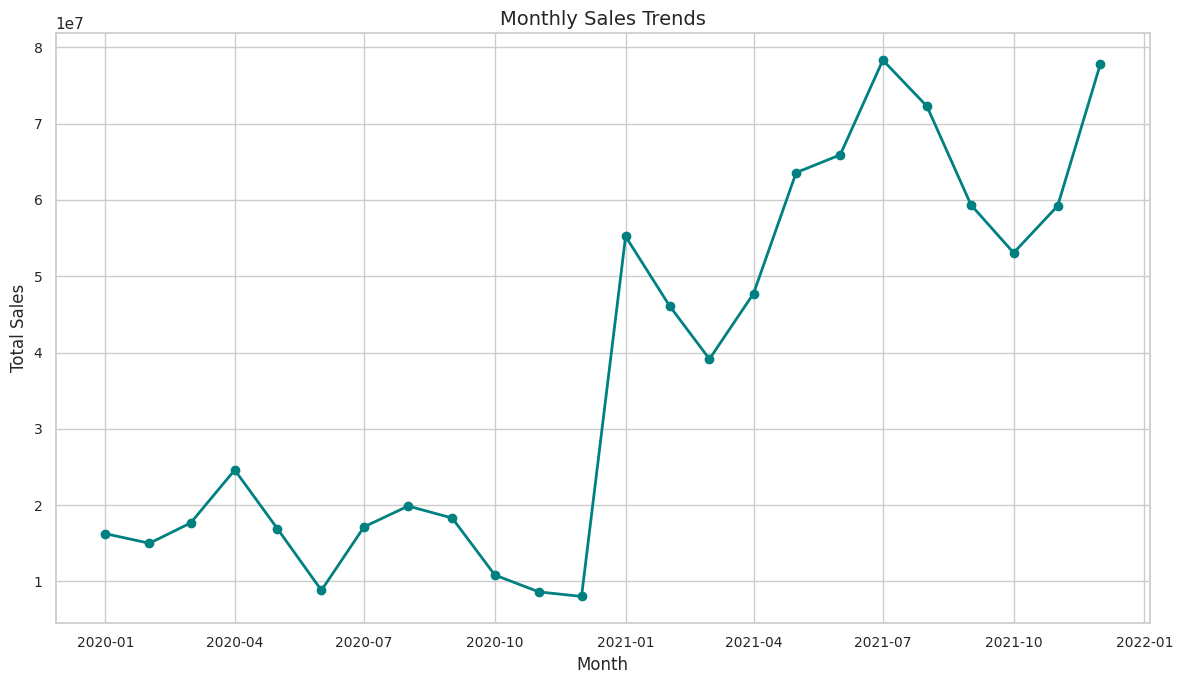

In [34]:
# Group by month and calculate total sales for each month
monthly_sales = data.groupby(data['Invoice Date'].dt.to_period('M'))['Total Sales'].sum()

# Convert the index (which is of type 'Period') to DateTime objects
monthly_sales.index = monthly_sales.index.to_timestamp()

# Setting the style for a more aesthetic plot
sns.set(style="whitegrid")

# Plotting the sales trends over time
plt.figure(figsize=(12, 7))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', color='teal', linestyle='-', linewidth=2)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.title('Monthly Sales Trends', fontsize=14)
plt.xticks(rotation=0)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tight_layout()
plt.show()

In [35]:
# Calculate the difference between consecutive months for trend analysis
diff = monthly_sales.diff()

# Define the threshold for significant change (seasonality)
seasonality_threshold = 10000

# Check for seasonality
if (diff.abs() > seasonality_threshold).any():
    print("These sales follow a seasonality.")
else:
    print("These sales do not follow a seasonality.")

# Check for trend
if (diff > 0).all():
    print("There is an increasing trend in sales.")
elif (diff < 0).all():
    print("There is a decreasing trend in sales.")
else:
    print("There is no consistent trend in sales.")


These sales follow a seasonality.
There is no consistent trend in sales.


#### Summary:

Monthly sales data from January 2020 to January 2022 exhibit significant variability with notable peaks around April 2021 and consistent increases in December and April of each year, potentially correlating with holiday seasons and sales promotions. The data show a general upward trend in sales over the two-year period, despite some notable dips, particularly in July 2020 and October 2021.

#### Insights:

The observed seasonal patterns, with sales spikes and dips, highlight the importance of understanding customer purchasing behavior and the impact of seasonality on sales. By leveraging these insights, businesses can align their marketing efforts, inventory management, and resource allocation with anticipated periods of high demand, ensuring that opportunities are maximized during peak seasons. This strategic approach can lead to better preparation for demand surges, improved customer satisfaction, and overall enhanced business performance.








# 9. Predictive Sales Analysis: Develop a forecast for monthly sales.

/tmp/ipykernel_37919/2565912032.py:12: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



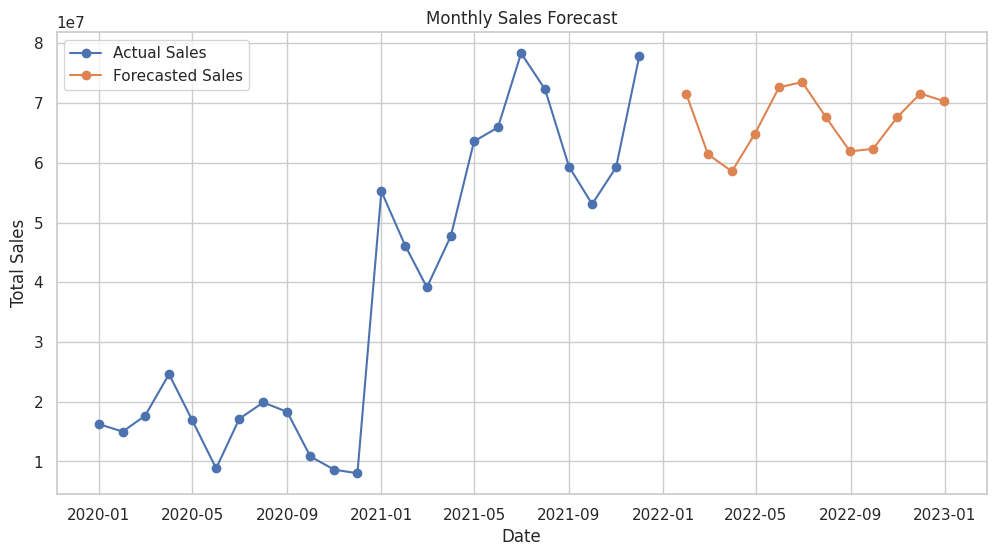

In [36]:
# Fit the ARIMA model to the data
model = ARIMA(monthly_sales, order=(2,1,2))  # Order: (p, d, q)
model_fit = model.fit()

# Make predictions for the next 12 months
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)

#Visualize the actual sales data and the forecasted values for the next months.
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', label='Actual Sales')
plt.plot(pd.date_range(start=monthly_sales.index[-1], periods=forecast_steps+1, freq='M')[1:], forecast, marker='o', label='Forecasted Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Forecast')
plt.legend()
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

## New Modifications

###  1. Price Elasticity of Demand

This calculates how sensitive sales are to price changes.

Helps determine how sales respond to price changes

In [37]:
import statsmodels.api as sm

# Prepare data for regression (Price as independent, Units Sold as dependent)
X = data['Price per Unit']
y = data['Units Sold']

# Add constant for regression
X = sm.add_constant(X)

# Fit OLS (Ordinary Least Squares) regression model
model = sm.OLS(y, X).fit()

# Print summary statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Units Sold   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     733.7
Date:                Fri, 07 Feb 2025   Prob (F-statistic):          8.55e-156
Time:                        16:31:48   Log-Likelihood:                -65118.
No. Observations:                9648   AIC:                         1.302e+05
Df Residuals:                    9646   BIC:                         1.303e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             81.7788      6.800     12.

### 2. Anomaly Detection in Sales

This identifies unexpected spikes or drops in total sales

Hepls identify unusual sales trends

In [39]:
import numpy as np

# Compute Z-scores for total sales
data['Z-score'] = (data['Total Sales'] - data['Total Sales'].mean()) / data['Total Sales'].std()

# Identify outliers (Z-score threshold > 3 or < -3)
outliers = data[np.abs(data['Z-score']) > 3]

# Save outliers to a CSV file for review
outliers.to_csv("Anomalous_Sales_Data.csv", index=False)

# Display the first few anomalies
print("Detected Sales Anomalies:")
print(outliers.head())


Detected Sales Anomalies:
       Retailer  Retailer ID Invoice Date     Region     State      City  \
0   Foot Locker      1185732   2020-01-01  Northeast  New York  New York   
4   Foot Locker      1185732   2020-01-05  Northeast  New York  New York   
6   Foot Locker      1185732   2020-01-07  Northeast  New York  New York   
10  Foot Locker      1185732   2020-01-23  Northeast  New York  New York   
12  Foot Locker      1185732   2020-01-25  Northeast  New York  New York   

                  Product  Price per Unit  Units Sold  Total Sales  \
0   Men's Street Footwear            50.0      1200.0     600000.0   
4           Men's Apparel            60.0       900.0     540000.0   
6   Men's Street Footwear            50.0      1250.0     625000.0   
10          Men's Apparel            60.0       900.0     540000.0   
12  Men's Street Footwear            50.0      1220.0     610000.0   

    Operating Profit  Operating Margin Sales Method State Abbreviation  \
0           300000.0  

### 3.Geographic Sales Heatmap

This helps visualize which regions/states are top performers

Quickly visualizes which states or cities are driving the most revenue

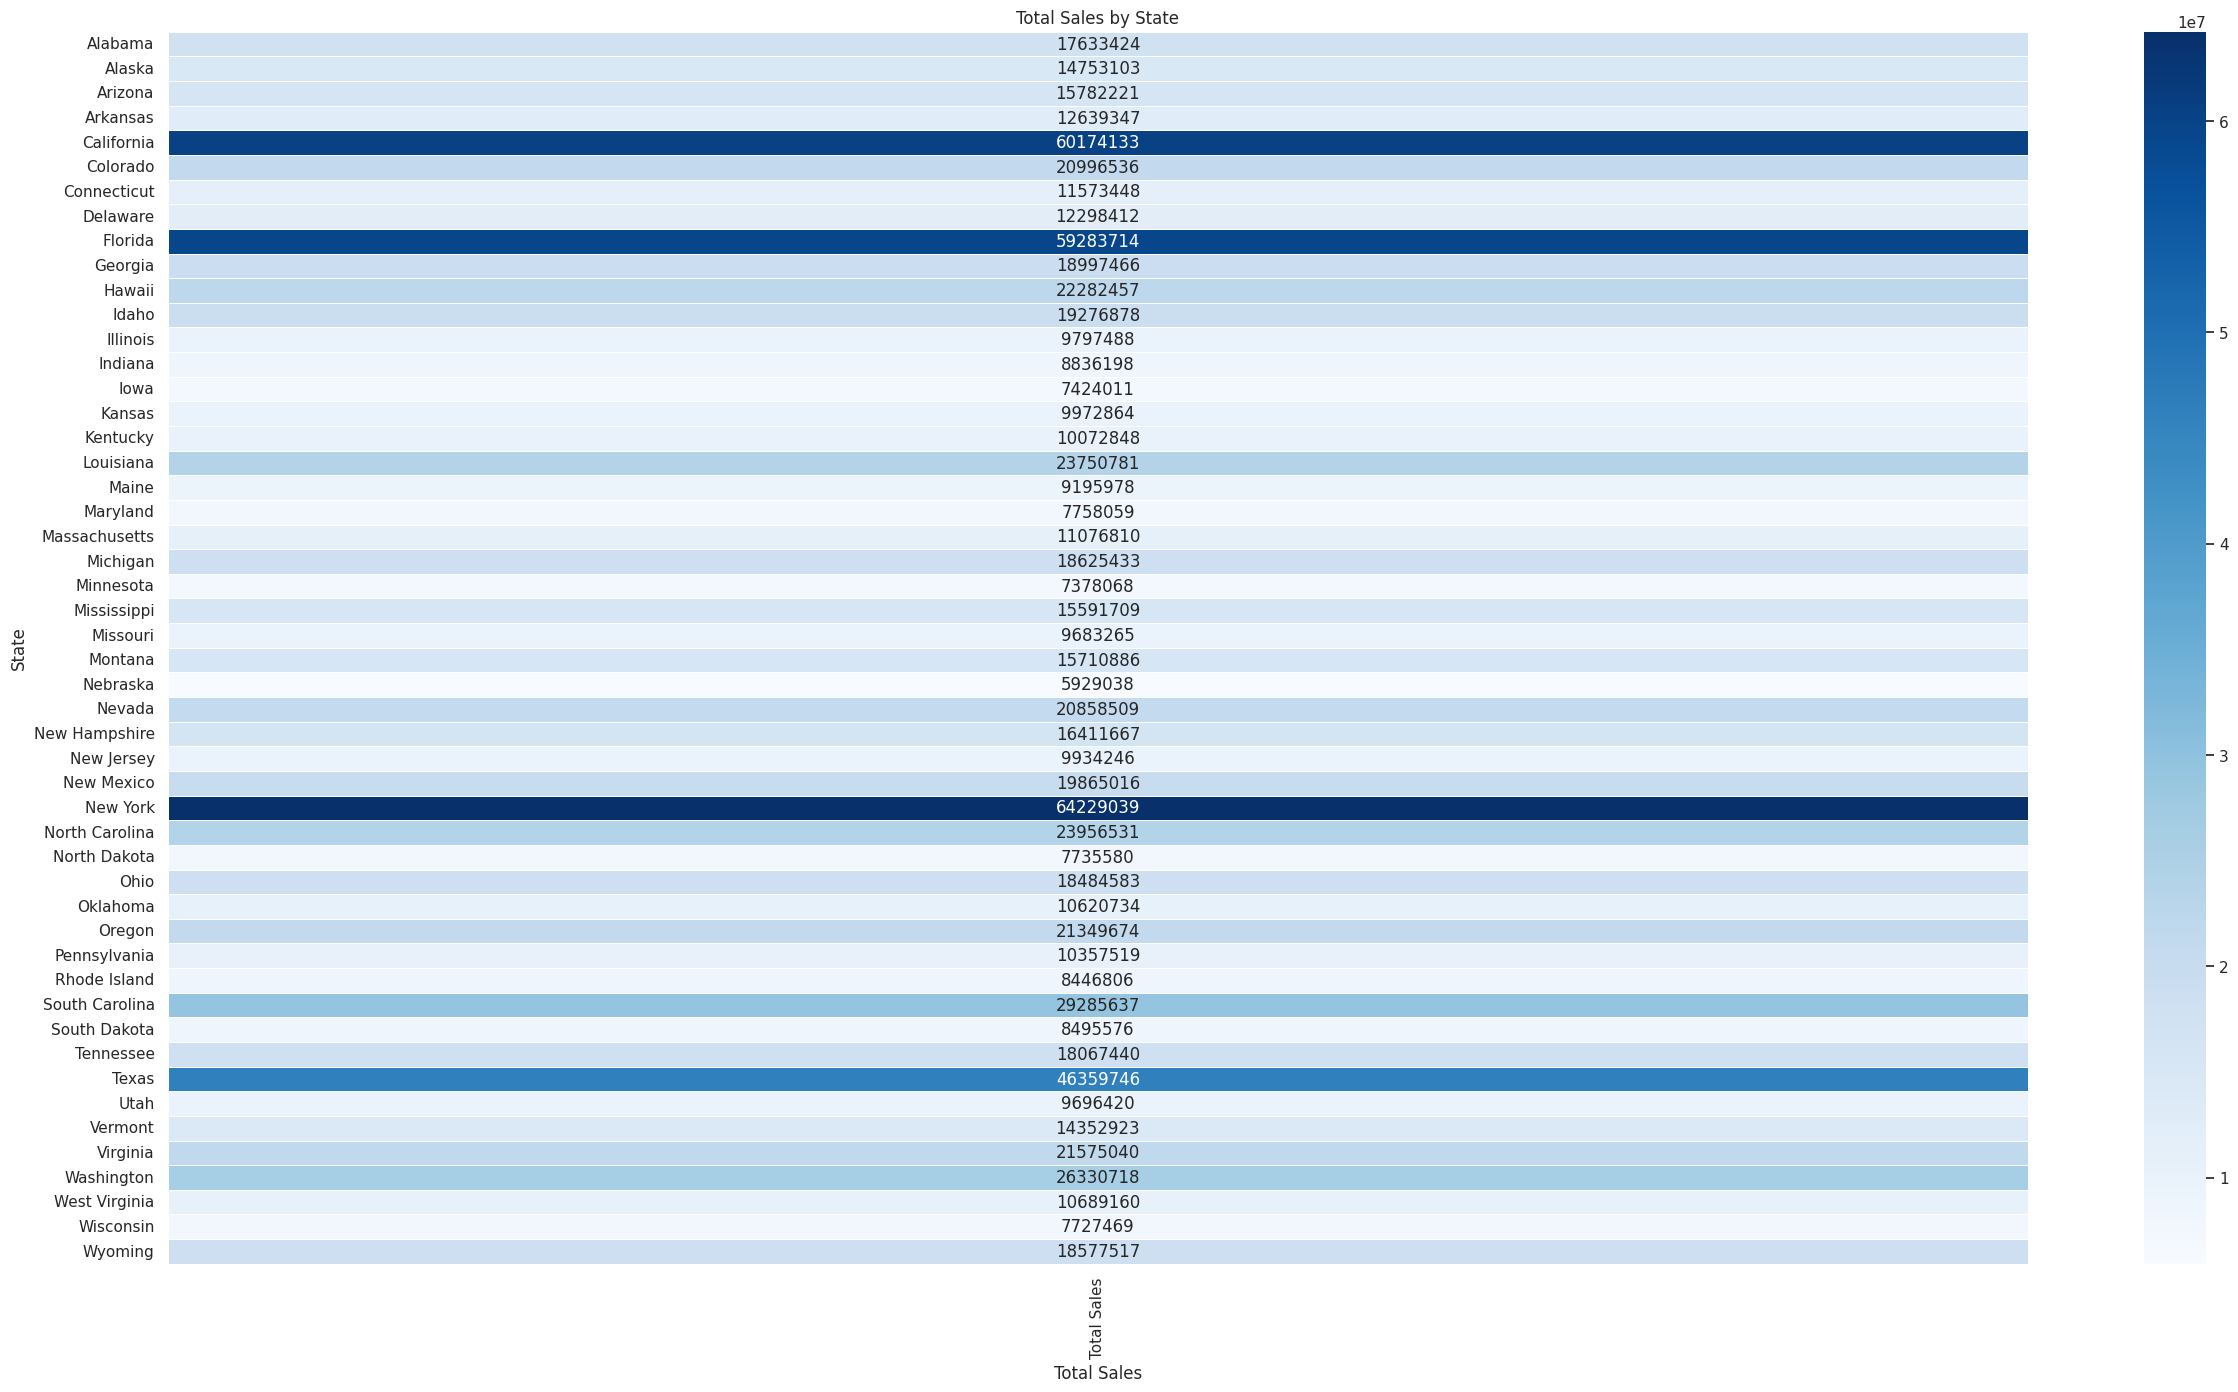

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Aggregate total sales by State
sales_by_state = data.groupby('State')['Total Sales'].sum().reset_index()

# Ensure pivoting works by setting a column for X-axis
sales_by_state_pivot = sales_by_state.pivot_table(index="State", values="Total Sales")

# Create a heatmap
plt.figure(figsize=(30,16))
sns.heatmap(sales_by_state_pivot, cmap="Blues", annot=True, fmt=".0f", linewidths=0.5)
plt.title("Total Sales by State")
plt.xlabel("Total Sales")
plt.ylabel("State")
plt.xticks(rotation=90)
plt.show()
